In [30]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)

In [3]:
# reading the dataset
diamond_df = pd.read_csv('diamonds.csv')
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Gathering info about the datasheet

In [4]:
print("There are", diamond_df.shape[0], "rows and", diamond_df.shape[1], "coloumns present in the datasheet.")

There are 53940 rows and 11 coloumns present in the datasheet.


In [5]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


So in the datasheet we visualised above it can be seen there is an index column by the name of `Unnamed: 0`, which needs to be eliminated as we already have index present by default.

In [6]:
diamond_df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Cleaning: Null Values and Duplicates

In [8]:
diamond_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
diamond_df[diamond_df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
2183,1.00,Fair,E,SI2,67.0,53.0,3136,6.19,6.13,4.13
2820,1.00,Fair,F,SI2,65.1,55.0,3265,6.26,6.23,4.07
3156,0.90,Very Good,I,VS2,58.4,62.0,3334,6.29,6.35,3.69
3704,1.00,Ideal,E,SI2,62.9,56.0,3450,6.32,6.30,3.97
3981,1.00,Fair,H,SI1,65.5,57.0,3511,6.26,6.21,4.08


In [9]:
diamond_df[diamond_df.duplicated()].shape

(146, 10)

From the above scripts it is confirmed that the dataset does not contain any null values but there are 146 duplicated rows.

In [10]:
diamond_df.drop_duplicates(inplace = True)

In [11]:
diamond_df[diamond_df.duplicated()].shape

(0, 10)

In [12]:
diamond_df.shape

(53794, 10)

## Descriptive Analytics

In [15]:
# continious columns
diamond_df.describe().round(2)

,carat,depth,table,price,x,y,z
count,53794.00,53794.00,53794.00,53794.00,53794.00,53794.00,53794.00
mean,0.80,61.75,57.46,3933.07,5.73,5.73,3.54
std,0.47,1.43,2.23,3988.11,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,951.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5326.75,6.54,6.54,4.03
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


In [14]:
diamond_df[diamond_df.carat == 5.01]

,carat,cut,color,clarity,depth,table,price,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


So the most weighted diamond present in the dataset is of 5.01 carats and the least is of 0.20 carat, whereas the most expensive diamond is of 18823 currency and the least expensive if of 326 currency.

In [16]:
# Categorical Columns
diamond_df['cut'].value_counts()

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64

In [17]:
diamond_df.color.value_counts()

G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64

In [18]:
diamond_df.clarity.value_counts()

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64

## Describing New Columns for better analysis

In [15]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Now the color description which is given in the data dictionary is only says J is the worst and D is the best but does not say much about the other colors and their rankings

In [16]:
diamond_df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [17]:
diamond_df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [18]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- **Categorising `color` column**

In [19]:
diamond_df['color_cat'] = diamond_df.color.replace({'D': 'Colorless', 'E': 'Colorless', 'F': 'Colorless', 
                         'G': 'Near Colorless', 'H': 'Near Colorless', 'I': 'Near Colorless', 'J': 'Near Colorless'})

In [20]:
diamond_df.color_cat.value_counts()

Near Colorless    27743
Colorless         26051
Name: color_cat, dtype: int64

In [21]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_cat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Colorless
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Colorless
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Colorless
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Near Colorless
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Near Colorless


- **Categorising `clarity` column**

Similarly for the clarity column as the values such as SI2, SI1 comes under the category Small Inclusions, similarly S1, S2, S3 means Small Inclusions hence this can be grouped for better analysis

In [22]:
diamond_df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [23]:
diamond_df['clarity_cat'] = diamond_df.clarity.replace({'SI2': 'Slighlty Included', 'SI1': 'Slighlty Included',
                           'VS1': 'Very Slightly Included', 'VS2': 'Very Slightly Included',
                           'VVS1': 'Very Very Slightly Included', 'VVS2': 'Very Very Slightly Included',
                           'I1': 'Internally Included', 'IF': 'Internally Flawless'})

In [24]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_cat,clarity_cat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Colorless,Slighlty Included
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Colorless,Slighlty Included
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Colorless,Very Slightly Included
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Near Colorless,Very Slightly Included
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Near Colorless,Slighlty Included


## Data Analysis and Visualisation

- **Univariate Analysis**
1. `carat` column

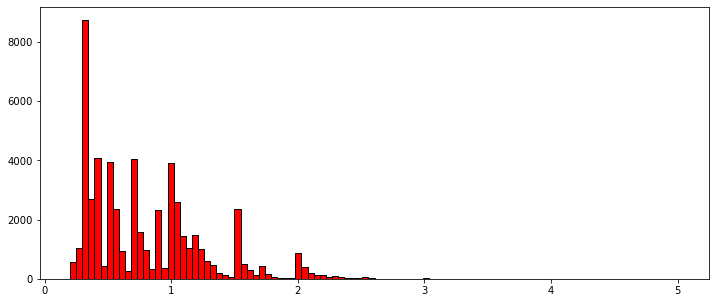

In [25]:
plt.figure(figsize = (12, 5))
plt.hist(diamond_df.carat, bins = 100, color = 'red', edgecolor = 'black')
plt.show()

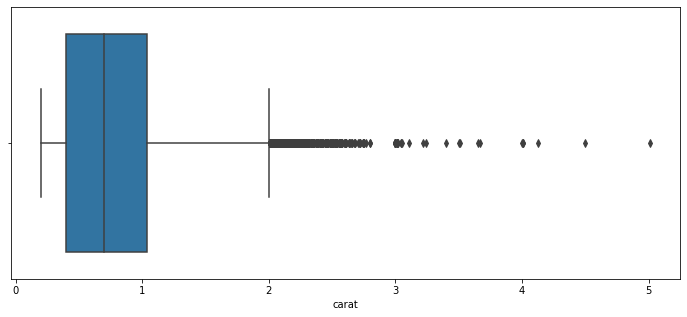

In [33]:
plt.figure(figsize= (12, 5))
sns.boxplot(diamond_df.carat)
plt.show()

From the above plot it can be seen that the carat column has a steady outler line till 2.7appx. after that the outliers became scattered and the most weighted diamond which is of 5.01 carats can be seen.

In [34]:
diamond_df.carat.describe()

count    53794.00000
mean         0.79778
std          0.47339
min          0.20000
25%          0.40000
50%          0.70000
75%          1.04000
max          5.01000
Name: carat, dtype: float64

2. `price` column

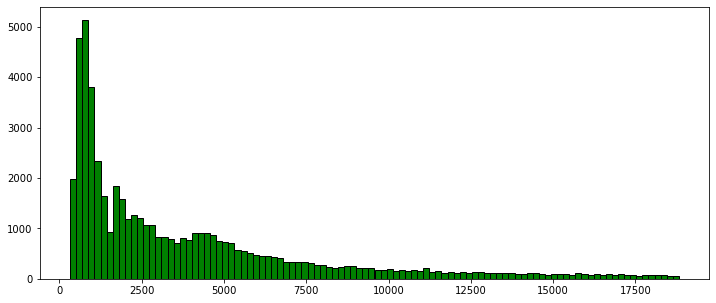

In [26]:
plt.figure(figsize = (12, 5))
plt.hist(diamond_df.price, bins = 100, color = 'green', edgecolor = 'black')
plt.show()

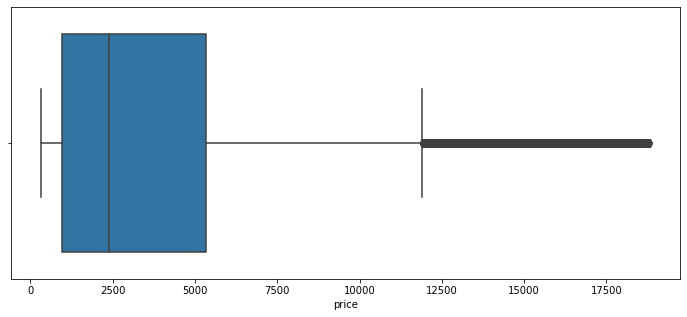

In [32]:
plt.figure(figsize = (12, 5))
sns.boxplot(diamond_df.price)
plt.show()

In [35]:
diamond_df.price.describe()

count    53794.000000
mean      3933.065082
std       3988.114460
min        326.000000
25%        951.000000
50%       2401.000000
75%       5326.750000
max      18823.000000
Name: price, dtype: float64

3. Count Analysis of Diamond based on their `cut`

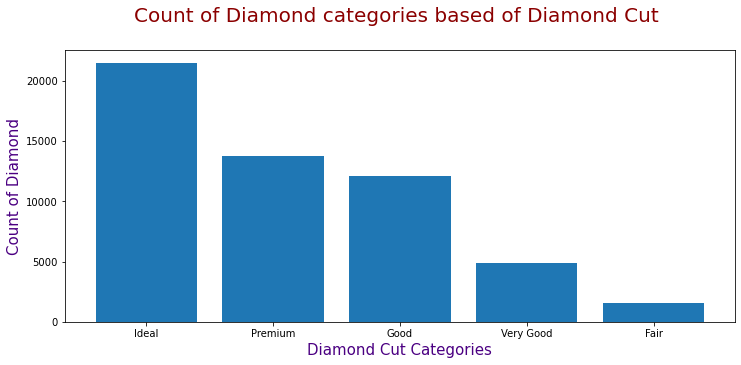

In [36]:
plt.figure(figsize = (12, 5))
plt.bar(diamond_df.cut.unique(), diamond_df.cut.value_counts(ascending = False))

plt.title('Count of Diamond categories based of Diamond Cut \n', fontdict = {'fontsize': 20, 'fontweight': 12, 'color': 'darkred'})
plt.xlabel('Diamond Cut Categories', fontdict = {'fontsize': 15, 'fontweight': 10, 'color': 'indigo'})
plt.ylabel('Count of Diamond', fontdict = {'fontsize': 15, 'fontweight': 10, 'color': 'indigo'})

plt.show()

In [37]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_cat,clarity_cat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Colorless,Slighlty Included
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Colorless,Slighlty Included
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Colorless,Very Slightly Included
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Near Colorless,Very Slightly Included
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Near Colorless,Slighlty Included


4. Count Analysis of Diamond based on their `color_cat`

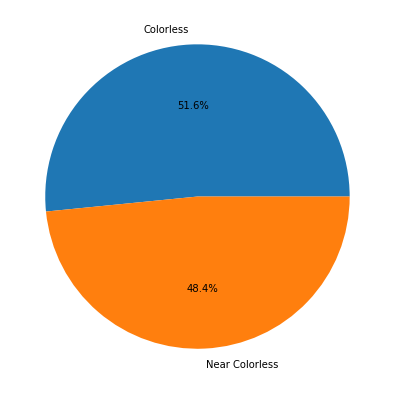

In [40]:
plt.figure(figsize = (7,7))
plt.pie(diamond_df.color_cat.value_counts(ascending = False),
       labels = diamond_df.color_cat.unique(),
       autopct = '%1.01f%%')
plt.show()

5. Count Analysis of Diamond based on their `clarity_cat`

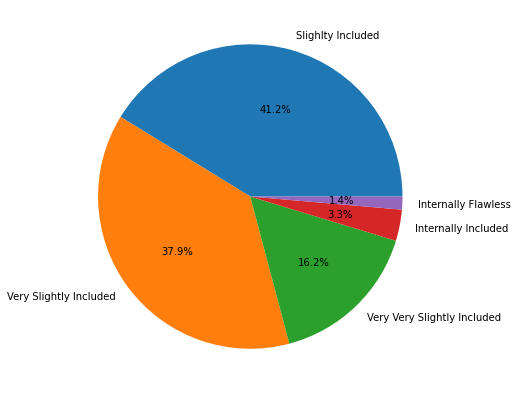

In [42]:
plt.figure(figsize = (7,7))
plt.pie(diamond_df.clarity_cat.value_counts(ascending = False),
       labels = diamond_df.clarity_cat.unique(),
       autopct = '%1.01f%%')
plt.show()

- **Bivariate Analysis**

1. Diamond Colour Analysis based on their clarity

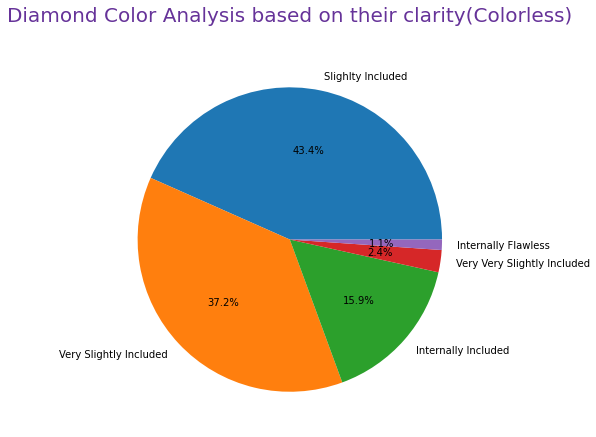

In [49]:
# Colourless Diamonds
plt.figure(figsize = (7, 7))
plt.pie(diamond_df.clarity_cat[diamond_df.color_cat == 'Colorless'].value_counts(), 
        labels = diamond_df.clarity_cat[diamond_df.color_cat == 'Colorless'].unique(), autopct = '%1.01f%%')
plt.title("Diamond Color Analysis based on their clarity(Colorless)\n", fontdict = {'fontsize': 20, 'fontweight': 12, 'color': 'rebeccapurple'} )

plt.show()

From the above plot it can be seen Slighly Included has occupied the gretest share whereas Internally Flawless which is marginal.

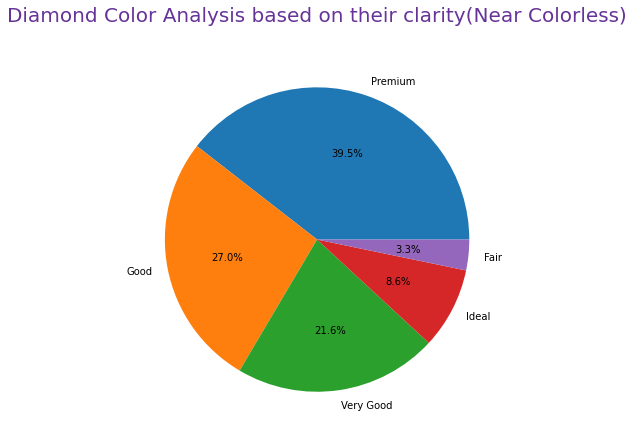

In [48]:
plt.figure(figsize = (7,7))
plt.pie(diamond_df.cut[diamond_df.color_cat == 'Near Colorless'].value_counts(), 
        labels = diamond_df.cut[diamond_df.color_cat == 'Near Colorless'].unique(), autopct = '%1.01f%%')
plt.title("Diamond Color Analysis based on their clarity(Near Colorless)\n", fontdict = {'fontsize': 20, 'fontweight': 12, 'color': 'rebeccapurple'} )


plt.show()

From the above plot it can be seen Premium has occupied the gretest share whereas Fair which is marginal.

2. Diamond Color Analysis based on their cut

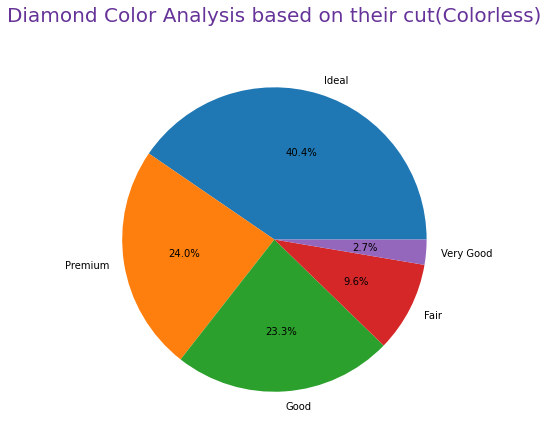

In [53]:
plt.figure(figsize = (7,7))
plt.pie(diamond_df.cut[diamond_df.color_cat == 'Colorless'].value_counts(), 
        labels = diamond_df.cut[diamond_df.color_cat == 'Colorless'].unique(), autopct = '%1.01f%%')
plt.title("Diamond Color Analysis based on their cut(Colorless)\n", fontdict = {'fontsize': 20, 'fontweight': 12, 'color': 'rebeccapurple'} )


plt.show()

From the above plot it can be seen Ideal has occupied the gretest share whereas Very Good which is marginal.

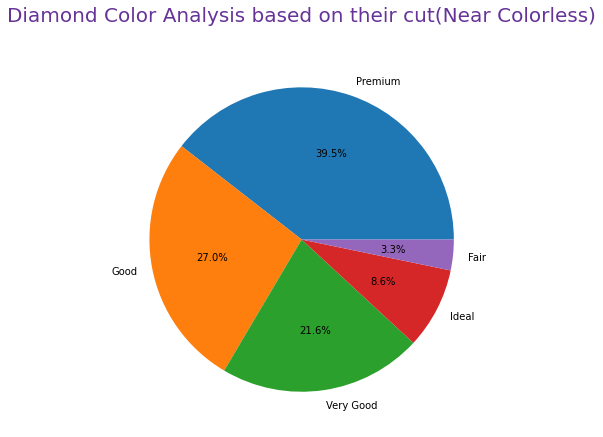

In [54]:
plt.figure(figsize = (7,7))
plt.pie(diamond_df.cut[diamond_df.color_cat == 'Near Colorless'].value_counts(), 
        labels = diamond_df.cut[diamond_df.color_cat == 'Near Colorless'].unique(), autopct = '%1.01f%%')
plt.title("Diamond Color Analysis based on their cut(Near Colorless)\n", fontdict = {'fontsize': 20, 'fontweight': 12, 'color': 'rebeccapurple'} )


plt.show()

From the above plot it can be seen Premium has occupied the gretest share whereas Fair which is marginal.

- Diamond Color vs Price Analysis

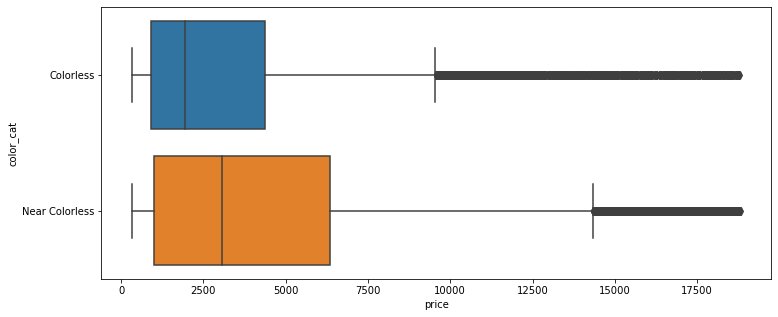

In [56]:
plt.figure(figsize = (12, 5))
sns.boxplot(diamond_df.price, diamond_df.color_cat)
plt.show()

Diamonds which are near colourless has the highest IQR and diamonds which are colourless has the highest outliers

- Diamond Price Analysis based on their cut

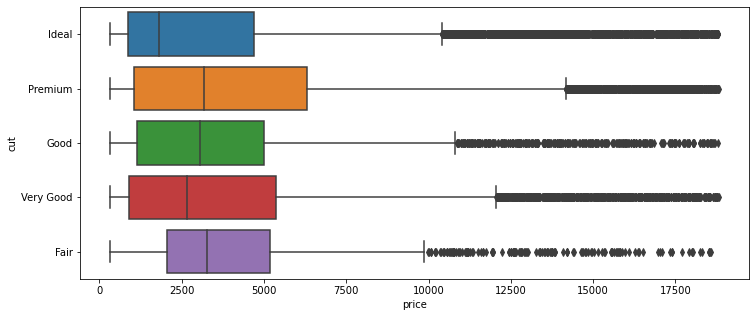

In [57]:
plt.figure(figsize = (12, 5))
sns.boxplot(diamond_df.price, diamond_df.cut)
plt.show()

Premium cut diamond has the highest price IQR and Fair cut diamond has the lowest price IQR

- Diamond Weight distribution based on their cut

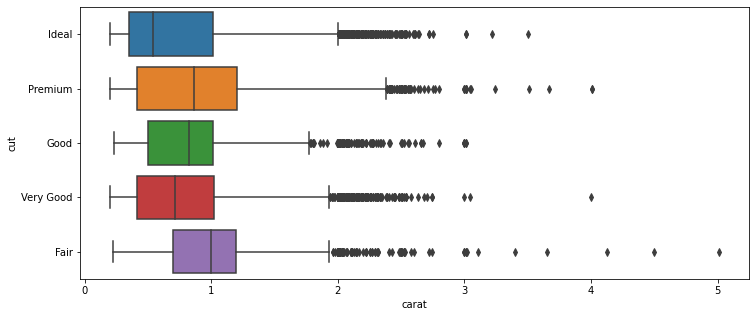

In [58]:
plt.figure(figsize = (12, 5))
sns.boxplot(diamond_df.carat, diamond_df.cut)
plt.show()

Fair cut diamond has the highest outlier value of 5 carats

- Diamond depth % analysis based on their weight

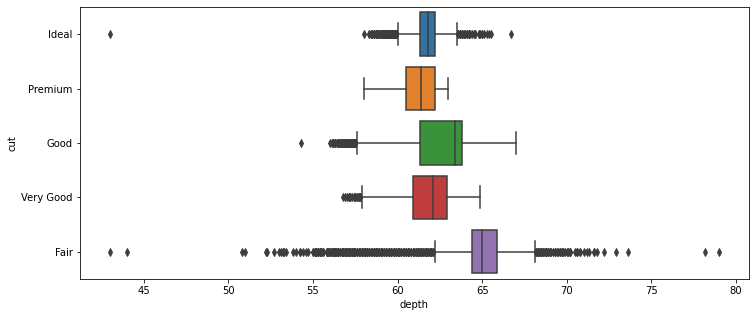

In [60]:
plt.figure(figsize = (12, 5))
sns.boxplot(diamond_df.depth, diamond_df.cut)
plt.show()

Ideal and Fair cut diamonds has the least depth and meanwhile fair cut diamond has the highest depth diamond also.

- Diamond table analysis based on their weight

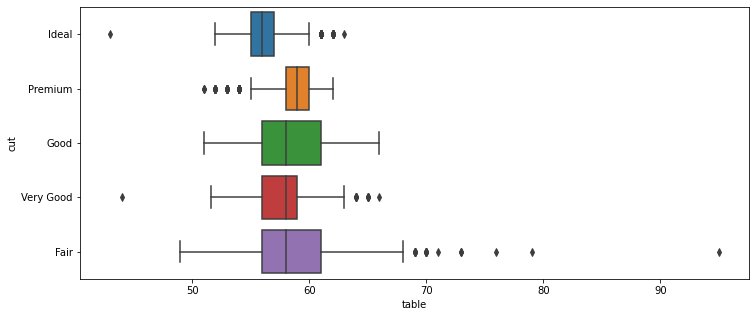

In [61]:
plt.figure(figsize = (12, 5))
sns.boxplot(diamond_df.table, diamond_df.cut)
plt.show()

Ideal cut diamond has the least table dimensions and mean while fair cut diamond has the highest table dimension

- Diamond Color vs Price Analysis

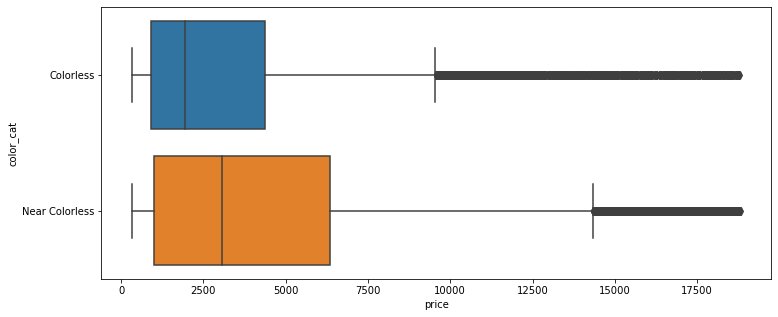

In [63]:
plt.figure(figsize = (12, 5))
sns.boxplot(diamond_df.price, diamond_df.color_cat)
plt.show()

Diamonds which are near colourless has the highest IQR and diamonds which are colourless has the highest outliers

- Diamond Clarity vs Price analysis

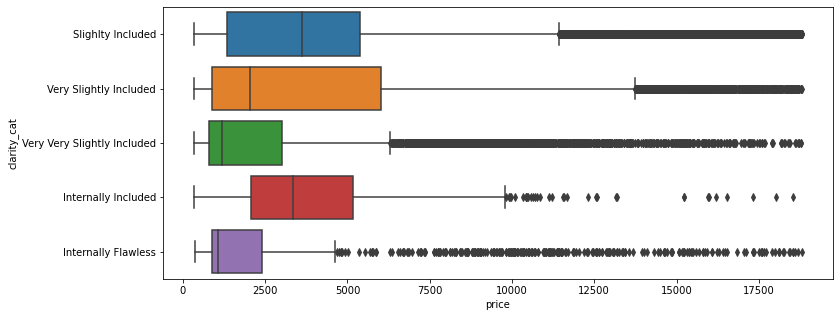

In [67]:
plt.figure(figsize = (12, 5))
sns.boxplot( diamond_df.price, diamond_df.clarity_cat)
plt.show()

## Multivariate Analysis

- Diamond Price vs Depth(%), Table analysis

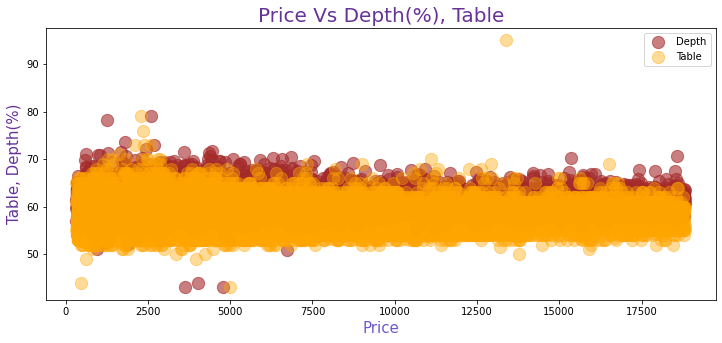

In [68]:
plt.figure(figsize = (12, 5))
plt.scatter(diamond_df.price, diamond_df.depth, c = 'brown', alpha = 0.6, s = 150, label = 'Depth')
plt.scatter(diamond_df.price, diamond_df.table, c = 'orange', alpha = 0.4, s = 150, label = 'Table')

plt.title('Price Vs Depth(%), Table', fontdict= {'fontsize': 20, 'fontweight': 15, 'color':'rebeccapurple'})
plt.xlabel('Price', fontdict= {'fontsize': 15, 'fontweight': 15, 'color':'slateblue'})
plt.ylabel('Table, Depth(%)', fontdict= {'fontsize': 15, 'fontweight': 15, 'color':'rebeccapurple'})
plt.legend()
plt.show()

From the above plot an outlier can be spotted, which is dimaond with table dimensions greater than 90.

In [69]:
diamond_df[diamond_df.table == diamond_df.table.max()]

,carat,cut,color,clarity,depth,table,price,x,y,z,color_cat,clarity_cat
24932,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87,Colorless,Slighlty Included


Let's understand which other factors affect the price of the diamond most and least

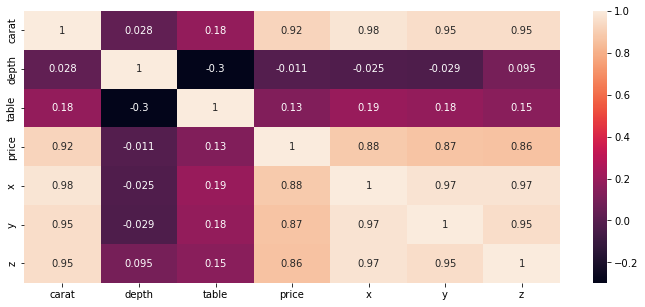

In [70]:
plt.figure(figsize = (12, 5))
sns.heatmap(diamond_df.corr(), annot = True, cbar = True)

plt.show()

Price of diamonds mostly affects due to various factor, below listed - 
1. Dimensions(x, y, z)
2. Weight(in Carats)

Whereas price of diamond is least affected by table dimension and depth percentage